# IN3050/4050 - Week 12: Reinforcement Learning

**Reinforcement Learning** (RL) is the last machine learning paradigm covered in this course. We will only take a cursory look at it. There is a lot of depth to this topic (just as for *supervised* and *unsupervised* learning), and we can of course not cover it in one single week. For those that are interested we can recomend the book "Reinforcement Learning: An Introduction" by Richard S. Sutton and Andrew G. Barto.

In these exercises we will focus on understanding the main concepts, and implementing basic reinforcement learning scenarios and solutions.

# Theory

Let us first redefine the main concepts underlying reinforcement learning:
1. What is an agent?
2. What is an environment?
3. What is a state?
4. What is an action?
5. What is a policy?
6. What is a reward?

**Answer**: enter your answers here.

In [2]:
"""
1. A agent is the learning element in the reinforcement learning that decide which policy it should use
to compute next state, based on previous states and reward recived. 

2. Environment is the rom of the given problem, it can for exemple be a table or a matrix. The environment contains
all the states, that the algorithm can act on by doing action. 

3. State is a condition by a given time. For exemple, a sequence of movement to move a robot. The sequence of movement
can be splited into states, so the robot will be able to compute next movement.

4. Action is how the algorithm behave or act on a environment to change to the next state. To get the goal of RL,
the algorithm will go throught a sequence of states. And between each state, the algorithm have to act on the enviroment,
so it bring us to the next state.

5. Policy is a function that take states and rewards, and to give what is the next action we should take to
maximize the reward. 

6. Reward is a feedback to the RL algorithm, where a positive reward will tell algorithm that the action we taken
is good, and make more of the same action. 
And negative reward tells that we made a bad action, and we should make less of this type of action. 
"""

'\n1. A agent is the learning element in the reinforcement learning that decide which policy it should use\nto compute next state, based on previous states and reward recived. \n\n2. Environment is the rom of the given problem, it can for exemple be a table or a matrix. The environment contains\nall the states, that the algorithm can act on by doing action. \n\n3. State is a condition by a given time. For exemple, a sequence of movement to move a robot. The sequence of movement\ncan be splited into states, so the robot will be able to compute next movement.\n\n4. Action is how the algorithm behave or act on a environment to change to the next state. To get the goal of RL,\nthe algorithm will go throught a sequence of states. And between each state, the algorithm have to act on the enviroment,\nso it bring us to the next state.\n\n5. Policy is a function that take states and rewards, and to give what is the next action we should take to\nmaximize the reward. \n\n6. Reward is a feedback 

# Exercise

In this section we are going to run some simulations on a simple *GridWorld* environment.

## Setup
We first import some support libraries.

In [315]:
import numpy as np
import matplotlib.pyplot as plt

import constants as const
import policies as plcs
import worlds as wlds

import random

The module **constants** simply contains some handy aliases. Actions and objects in the environment are identified by integer numbers. This module allows you to refer to actions using the format *const.LEFT* instead of an integer number; similarly objects in the world can be referred to *const.WALL* instead of an integer number. Check out the source file if you want to see the association between aliases and their integer encoding.

The module **policies** contains a set of pre-made policies that we will use in the exercise.

The module **worlds** contains a set of pre-made gridworlds that we will use in the exercise.

## Environment: GridWorld
Our environment is a simple GridWorld, that is a discrete flat rectangular environment made up $N\times M$ squares, thus defining a grid. One square is identified as the *starting position*, and another square is the *ending position*. An agent start in the starting position, and its aim is to reach the ending position. A gridworld may be enriched with additional *walls* (that is, squares where the agent can not pass) and *traps* (that is, squares that kill the agent and terminate the episode).

This gridworld model is **completely deterministic** (actions never fail) and **completely observed** (the agent perfectly knows the state of the world). 

In [4]:
import gridworld as gw

The module **gridworld** contains the class *GridWorld* implementing the environment with which the agent interact. An object *GridWorld* offers the following interface:
- **GridWorld(width,height, staring_position_x,staring_position_y, ending_position_x,ending_position_y)**: this is the constructor for a gridworld. It expects six parameters: the *width* and the *length* of the gridworld; the coordinates x and y of the starting position (*staring_position_x,staring_position_y*) and of the ending position (ending_position_x,ending_position_y). It returns an instance of a gridworld.
- **add_wall(x,y)**: this is a function to add a wall to the gridworld in location *x,y*.
- **add_trap(x,y)**: this is a function to add a trap to the gridworld in location *x,y*.
- **step(action)**: this is a function that takes an *action* passed as a parameter. The gridworld processes the action and returns four values: the new *state* of the world (that is, the new position of the agent in the form of a Loc object with two attributes x and y); the *reward* obtained by the agent by performing the action; a boolean *termination* indicating whether the episode terminated; and, optionally, some debug messages. 
- **reset()**: this is a function to reset the environment to the starting condition; it returns the same values as step().
- **print_basic()**: this is a function to produce a simple textual representation of the environment on the screen.
- **print_unicode()**: this a slightly fancier printing function using Unicode characters (if support is available).

**CAUTION**: A gridworld is indexed as a numpy matrix. Thus, if you build a $10 \times 10$ matrix, the height and the width of the gridworld will be 10; however the square in the world will be indexed from 0 to 9, with (0,0) being the upper-left corner square, and (9,9) being the lower-right corner square. 


An example $3 \times 3$ world:
![title](grid.png)

**Verification of consistency in *YOUR* hands!**

## Playing with the GridWorld

Create now a $4 \times 4$ gridworld with starting position in the upper-left corner and ending position in botttom-right.

In [5]:
"""
Action constant
[LEFT, UP, DOWN, RIGHT]
"""

'\nAction constant\n[LEFT, UP, DOWN, RIGHT]\n'

In [6]:
W = gw.GridWorld(4,4,0,0,3,3)

Let us add a wall near the center in location (1,2).

In [7]:
W.add_wall(1,2)

Visualize the world using one of the supported print functions.

In [8]:
W.print_basic()

[[  8    0    0    0 ]
 [  0    0    7    0 ]
 [  0    0    0    0 ]
 [  0    0    0    9 ]]




In the basic rendering 0 is an open space, 1 is the starting position, 6 is a trap, 7 is a wall, 8 is the agent and 9 is the ending position.

In the unicode rendering a white square is an open space, alpha is the starting position, a cross is a trap, a black square is a wall, the agent is a smile and omega is the ending position.

Resetting is a useful operation to restart the environment clean. It is a good practice to call it before starting any simulation to be certain that the environment is in the starting state. Call the reset function.

In [9]:
W.reset()

(<gridworld.Loc at 0xf7b18f0>, 0, False, [])

Take the action of a step to the right, print the return values of the action, visualize the world again, and comment on the action and its consequences. 

In [10]:
print(W.step(const.RIGHT))
W.print_unicode()

(<gridworld.Loc object at 0x0F7B1D50>, -1, False, ['I moved', None, None])
Α ☺ □ □
□ □ ■ □
□ □ □ □
□ □ □ Ω




**Comment**: enter your comment here.

Try now to take a step in the up direction, print the return values of the action, visualize, and comment on the action.

In [11]:
print(W.step(const.UP))
W.print_unicode()

(<gridworld.Loc object at 0x0F7B1D50>, -1, False, ['I can not move out of the world', None, None])
Α ☺ □ □
□ □ ■ □
□ □ □ □
□ □ □ Ω




**Comment**: enter your comment here.

In [12]:
"""
The action UP will take the agent out of the world, which is not allowed. Therefor it give a message that telles 
about "I can not move out of the world". And agent stays on the same place.
"""

'\nThe action UP will take the agent out of the world, which is not allowed. Therefor it give a message that telles \nabout "I can not move out of the world". And agent stays on the same place.\n'

Lead the agent to the objective, print the return values of the action, visualize, and comment on the actions and the rewards.

In [13]:
print(W.step(const.RIGHT))
print(W.step(const.RIGHT))
print(W.step(const.DOWN))
print(W.step(const.DOWN))
print(W.step(const.DOWN))
W.print_unicode()

(<gridworld.Loc object at 0x0F7B1C30>, -1, False, ['I moved', None, None])
(<gridworld.Loc object at 0x0F7B1FD0>, -1, False, ['I moved', None, None])
(<gridworld.Loc object at 0x0F7DC070>, -1, False, ['I moved', None, None])
(<gridworld.Loc object at 0x0F7DC0F0>, -1, False, ['I moved', None, None])
(<gridworld.Loc object at 0x0F7DC170>, 100, True, ['I moved', None, 'Objective reached'])
Α □ □ □
□ □ ■ □
□ □ □ □
□ □ □ ☺




**Comment**: enter your comment here.

In [14]:
"""
We see that each action (movment) give a reward of -1, before we reach the goal.
When we reach the goal, then it give a reward of 100.
"""

'\nWe see that each action (movment) give a reward of -1, before we reach the goal.\nWhen we reach the goal, then it give a reward of 100.\n'

Reset the world to the starting state, print the return values of the action, visualize, and comment on the result.

In [15]:
print(W.reset())
W.print_unicode()

(<gridworld.Loc object at 0x0F7B18F0>, 0, False, [])
☺ □ □ □
□ □ ■ □
□ □ □ □
□ □ □ Ω




**Comment**: enter your comment here.

In [16]:
"""
We see that after reset, the agent is in the start position.
The termination condition is False, after we do a reset.
"""

'\nWe see that after reset, the agent is in the start position.\nThe termination condition is False, after we do a reset.\n'

## Policy Evaluation

One of the main problems in reinforcement learning is **policy evaluation**: *given a policy for acting in the environment, how good is the policy?*

We will consider and answer this question first for simple *deterministic* policies (computing the simple overall return of a policy) and then for *stochastic* policies (using Monte Carlo to estimate the average overall return of a policy).

### Setting up the environment
First load *world1()* from *wrlds* and visualize it.

In [17]:
W = wlds.world1()
W.print_unicode()

☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω




### Running a deterministic policy
We will first use the **deterministic policy** *plcs.policy1()*. This defines a policy that moves the agent always to the right until it reaches the border, and then heads down.

Design a loop that makes the agent interact with the environment using this policy until termination. Visualize the output at each step to verify that the policy works as expected.

In [18]:
state, reward, termination, msgs = W.reset() 

while(not termination):
    state, reward, termination, msgs = W.step(plcs.policy1(state))
    W.print_unicode()    

Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ ☺
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ ☺
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ ☺
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
□ □ □ ☺




Edit the previous loop to track the states traversed, the actions taken, and the rewards collected.

In [19]:
states = []
actions = []
rewards = []

state, reward, termination, msgs = W.reset() 

while(not termination):
    action = plcs.policy1(state)
    state, reward, termination, msgs = W.step(action)
    
    states.append(state)
    actions.append(action)
    rewards.append(reward)
    
    W.print_unicode()
    
print("States: ", states, "\n")
print("Actions: ", actions, "\n")
print("Rewards: ", rewards, "\n")

Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ ☺
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ ☺
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ ☺
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
□ □ □ ☺


States:  [<gridworld.Loc object at 0x0F7DAF70>, <gridworld.Loc object at 0x0F7DA5D0>, <gridworld.Loc object at 0x0F7DAFD0>, <gridworld.Loc object at 0x0F7E0A10>, <gridworld.Loc object at 0x0F7B1F10>, <gridworld.Loc object at 0x0F7E22D0>] 

Actions:  [3, 3, 3, 2, 2, 2] 

Rewards:  [-1, -1, -1, -1, -1, 100] 



### Computing the return of a deterministic policy
One of the main quantities to evaluate the goodness of a policy is the *return*. While a *reward* quantifies the local/short-term goodness of a single action, the *return* quantifies the global/long-term goodness of a policy.

Remember that we can compute the overall return of a policy $\pi$ from time $t$ using a discount $\gamma$ as:

$$
G_{\pi}(t) = r(t) + \sum_i \gamma^i r(t+i),
$$
where $G_{\pi}(t)$ is the return at time $t$ and r(t) is the reward at time $t$ under policy ${\pi}$. 

Write code to compute the return of policy *plcs.policy1()* from the initial state at $t=0$ with a discount rate of $\gamma = 0.9$.

Return: 0
Number of rewards:  6
Return: -1.0
Number of rewards:  6
Return: -0.9
Number of rewards:  6
Return: 81.0
Number of rewards:  6
Return: 90.0
Number of rewards:  6
Return: 100.0
Number of rewards:  6


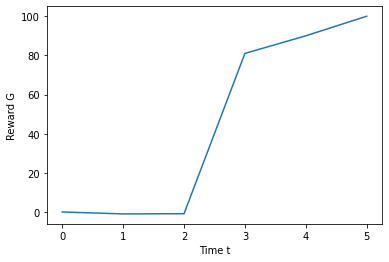

In [78]:
def G(W,policy,t):
    gamma = 0.9
    
    states = []
    actions = []
    rewards = []
    
    index = 0
    sum_tmp = 0

    state, reward, termination, msgs = W.reset() 

    while(not termination):
        action = policy(state)
        state, reward, termination, msgs = W.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
    
    for i in range(t):
        if (t >= len(rewards)):
            print("t cant be greater than numbers of rewards")
            return;
        elif (t+i >= len(rewards)):
            continue
        else:
            sum_tmp = (gamma**i)*rewards[t+i]
    
    G = sum_tmp

    print('Return: {0}'.format(G))
    print("Number of rewards: ", len(rewards))
    return G

G_values = []
for t in range(6):
    G_values.append(G(W,plcs.policy1,t))

plt.figure()
plt.xlabel('Time t')
plt.ylabel('Reward G')
plt.plot(np.arange(0,len(G_values)), G_values)

Run now the same code using the policy *plcs.policy2()*. This defines a deterministic policy that moves the agent first downwards, then upwards, and finally right and down to the objective. Plot the policy, compute its return and comment on the two policies you analyzed.

Return: 0
Number of rewards:  12
Return: -1.0
Number of rewards:  12
Return: -0.9
Number of rewards:  12
Return: -0.81
Number of rewards:  12
Return: -0.7290000000000001
Number of rewards:  12
Return: -0.6561
Number of rewards:  12
Return: 59.04900000000001
Number of rewards:  12
Return: 65.61
Number of rewards:  12
Return: 72.9
Number of rewards:  12
Return: 81.0
Number of rewards:  12
Return: 90.0
Number of rewards:  12
Return: 100.0
Number of rewards:  12


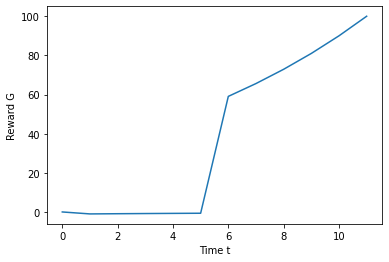

In [79]:
G_values = []
for t in range(12):
    G_values.append(G(W,plcs.policy2,t))

plt.figure()
plt.xlabel('Time t')
plt.ylabel('Reward G')
plt.plot(np.arange(0,len(G_values)), G_values)

**Comment**: enter your comment here.

In [22]:
"""
We see that the policy 1 uses less time t than policy 2 to get the goal.
Both policy reach the goal and have a final reward of 200, but policy 1 is
more effectiv than the policy 2.
"""

'\nWe see that the policy 1 uses less time t than policy 2 to get the goal.\nBoth policy reach the goal and have a final reward of 200, but policy 1 is\nmore effectiv than the policy 2.\n'

### Limitation of the deterministic policy
The deterministic policy *plcs.policy1()* is optimal for *wlds.world1()*. However deterministic policies have severe limitations.

Load *world2* from *wlds*, plot the environment, and run 10 steps of *plcs.policy1()*. Comment on the results.

In [23]:
W = wlds.world2()
W.print_unicode()

state, reward, termination, msgs = W.reset() 

for i in range(10):
    state, reward, termination, msgs = W.step(plcs.policy1(state))
    W.print_unicode()    

☺ □ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω




**Comment**: enter your comment here.

In [25]:
"""
The policy 1 defines that the agent should move to right and when it reach the border then it go downward. 
But in the world2, there is a wall that block the agent to move towards the border. 
Therefor it the agent will stuck on the same place, and never reach the goal.
"""

'\nThe policy 1 defines that the agent should move to right and when it reach the border then it go downward. \nBut in the world2, there is a wall that block the agent to move towards the border. \nTherefor it the agent will stuck on the same place, and never reach the goal.\n'

### Running a stochastic policy

Having assessed the limitation of a deterministic policy, we now consider a **stochastic policy**. A stochastic policy adds some randomness in the selection of the action to perform. Taking random actions will allow the agent to *explore* more of the world and will provide a higher degree of *generalization*/*adaptability*.
We use here *plcs.policy_epsilon1()*, a stochastic variant of *plcs.policy1()*, that behaves according to *plcs.policy1()*, except that 20% of the time it will take a random action.

Run *plcs.policy1()* both on *world1* and *world2* and comment on the results. (You may want to run your simulation more than one time).

In [294]:
W = wlds.world1()

def run_policy(W,policy,number_of_run):
    print("Init world: ")
    W.print_unicode()
    print("Runs: ")

    state, reward, termination, msgs = W.reset() 
    for i in range(number_of_run):
        state, reward, termination, msgs = W.step(policy(state))
        W.print_unicode()
        
        if termination:
            break;
            
    print("All done!")
    
run_policy(W,plcs.policy_epsilon1,10)

Init world: 
☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Runs: 
Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ ☺
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ ☺
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ ☺
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ ☺
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
□ □ □ ☺


All done!


In [31]:
W = wlds.world2()

run_policy(W,plcs.policy_epsilon1,10)

Init world: 
☺ □ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Runs: 
☺ □ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ ■ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ■ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ ■ □
□ □ ☺ □
□ □ □ □
□ □ □ Ω


Α □ ■ □
□ □ □ ☺
□ □ □ □
□ □ □ Ω


Α □ ■ □
□ □ □ □
□ □ □ ☺
□ □ □ Ω


Α □ ■ □
□ □ □ □
□ □ □ □
□ □ □ ☺


All done!


**Comment**: enter your comment here.

In [32]:
"""
By using the stochastic policy, the agent have chance to get out of the position where it get stuck.
Therefor we see that in the run 2,3,4 it stuck, but it went down in the run 5 because the 20% randomness.
At the end it successfully came to the goal. If we use the policy1, then it will never reach the goal.
"""

'\nBy using the stochastic policy, the agent have chance to get out of the position where it get stuck.\nTherefor we see that in the run 2,3,4 it stuck, but it went down in the run 5 because the 20% randomness.\nAt the end it successfully came to the goal. If we use the policy1, then it will never reach the goal.\n'

### Computing the return of a stochastic policy
As in the case of deterministic policies, we want to be able to quantify the goodness of a stochastic policy. However, the simple approach we adopted above will not immediately work in the case of a stochastic policy. Any two simulations using a stochastic policy will likely return different results, and computing returns on each of them will yield different values.

### Monte Carlo Policy Evaluation (return)

As discussed above, we can not evaluate the return of a stochastic policy deterministically from a single simulation. Indeed, two different simulations would yield different returns. An intuitive solution to this problem would be to compute the return of the stochastic policy *in expectation*.

**Monte Carlo methods** constitute a wide family of techniques based on simulation and estimation of expected quantities. Imagine you are given a system whose dynamics are unknown or too hard to analyze analytically; suppose also that the system can be cheaply simulated; then we can try to answer questions about this system by repeatedly running simulations, collecting samples, and computing statistical quantities about the system.

In our case, the dynamics of the environment (how we transition from one state to another given an action) are known and we could theoretically compute analytically the value of the policy. However we assume that this computation is too expensive and we rely on a Monte Carlo approximation. 

What we (and the agent) do is trying out a given policy many times; each repetition, from the starting state to termination, is called an *episode*; the list of actions, states and rewards collected during an episode is called a *trajectory*. Given a set of trajectories, we can compute the expected value of our policy.

As you know, *Monte-Carlo* is just one approach to (tabular) policy evaluation in the case of stochastic policies. Alternatives are *dynamic programming* (where we assume the agent knows the dynamics of the environment) or *temporal differences* (where we assume that we do not have complete episodes).

Load *wlds.world1()* and *plcs.policy_epsilon1()*, and run 50 episodes with this setting while collecting the trajectories of your simulations.

In [297]:
def run_policy(W,policy):
    trajectori = []
    traj_rewards = []
    state, reward, termination, msgs = W.reset()
    trajectori.append(state)
    traj_rewards.append(reward)
    
    while(not termination):
        
        state, reward, termination, msgs = W.step(policy(state))
        trajectori.append(state)
        traj_rewards.append(reward)
        
    return trajectori, traj_rewards

n_episodes = 50
episodes = []
trajectories = []
rewards =[]

W = wlds.world1()

for i in range(n_episodes):
    trajectori, reward = run_policy(W,plcs.policy_epsilon1)
    trajectories.append(trajectori)
    rewards.append(reward)

We can now use the data we have collected to compute the return in expectation:
$$ G_{\pi}(t) = \mathbb{E} \left[r(t) + \sum_i \gamma^i r(t+i)\right]. $$

This simply corresponds to the average return over the episodes:
$$ \hat{G}_{\pi}(t) = \frac{1}{N_e} \sum_{e=1}^{N_e} \left( r^{(e)}(t) + \sum_i \gamma^i r^{(e)}(t+i) \right), $$
where $r^{(e)}$ is the reward obtained during episode number $e$, and $N_e$ is the number of episodes collected.

Compute the expected return of policy *plcs.policy_epsilon1()* from the trajectories you collected, compare it with the return of the deterministic policy and comment.

In [80]:
def G(t, rewards):
    gamma = 0.9
    
    index = 0
    sum_tmp = 0
    
    for i in range(t):
        if (t >= len(rewards)):
            print("t cant be greater than numbers of rewards")
            return;
        elif (t+i >= len(rewards)):
            continue
        else:
            sum_tmp = (gamma**i)*rewards[t+i]
            
    G = sum_tmp
    return G

In [84]:
totG = 0.0
sum_res = 0
for i in range(n_episodes):
    totG += G(len(rewards[i])-1, rewards[i])

print(totG)

hatG = totG / n_episodes   
print('Return: {0}'.format(hatG))    


5000.0
Return: 100.0


**Comment**: enter your comment here.

In [85]:
"""
We see that if we ran it with t = len(rewards[i]-1) and sum up all 50 episodes, it give a G_hat that is 100.
This is same as when we compute the return G to the policy1 at t = len(rewards[i]-1).
This means retrun of policy_epsilon is approximate as good as the most policy1, and both policy came to the goal.
"""

'\nWe see that if we ran it with t = len(rewards[i]-1) and sum up all 50 episodes, it give a G_hat that is 100.\nThis is same as when we compute the return G to the policy1 at t = len(rewards[i]-1).\nThis means retrun of policy_epsilon is approximate as good as the most policy1, and both policy came to the goal.\n'

## Policy improvement

So far, we have only considered the problem of evaluating how good a given policy is. We now consider a second central problem in reinforcement learning, that is, **policy improvement**: *given a policy, how can we construct a better policy?*

### State values and Action-state values
In the previous section we have evaluated policies by computing or estimating their overall return. This is a **global** value that assesses the goodness of a predefined policy from the beginning to the end. Comparing two policies according to their overall return is simple. But improving policies relying only on this quantity is tricky. Generating new policies, computing their overall return, and comparing with existing policies is unfeasible, as the number of possible policies explodes with the number of states and actions.

Ideally, we need some form of **local** information that would allow us to assemble new policies in a *modular* way. These quantities are:
- **state values** $v(s)$: evaluating how good is it to be in a certain state $s$ (more precisely, what is the expected return for a certain state $s$).
- **action-state values** $q(s,a)$: evaluating how good is it to take a certain action $a$ being in a certain state $s$ (more precisely, what is the expected return from a certain state $s$ by taking action $a$).
By knowing locally how good is a certain state or how good is a certain action we can steer the choices towards better policies.

### State values

The state value $v(s)$ of a state $s$ under the policy $\pi$ is defined as:
$$
v_{\pi}(s) = \mathbb{E} \left[ G(t) \vert S(t)=s \right],
$$
that is the return, as we computed above, but starting now from state $s$ instead of the initial state.

As before, computing the return for a stochastic policy is not immediate, and it requires relying on one of the approaches referenced above (*dynamic programming, Monte Carlo, temporal differences*).

### Monte Carlo Policy Evaluation for State Values

The same Monte Carlo principle we used to estimate overall returns may be used to compute state values: we run several episodes of the agents acting in the world and then we compute the state values.

First we generate the data. We use the same environment, but we now consider as a starting policy a completely random policy. This choice represents our complete ignorance about the environment (no one provided us with an almost optimal policy) and it will allow the agent to explore the environment more widely.

Load *wlds.world1()* and *plcs.policy_random()*, and run 100 episodes with this setting while collecting the trajectories of your simulations.

In [88]:
n_episodes = 100
episodes = []
rewards =[]

W = wlds.world1()

for i in range(n_episodes):
    trajectori, reward = run_policy(W,plcs.policy_random)
    episodes.append(trajectori)
    rewards.append(reward)

We are going to compute the state value function $v(s)$ of each state $s$ using the *first-visit* Monte Carlo algorithm. For each state $s$, we find the first instance in an episode and compute its return. At the end we compute the expected return.

Compute the state value function using the first-visit Monte Carlo algorithm. 
1. Iterate over every state; a state is encoded as *gw.Loc()* object from the module *gw*; the constructor *gw.Loc(x,y)* receives the $x,y$ coordinates of a square in the grid world.
2. Iterate over the episodes; in each episode find the first occurence of the current state; you can use the function *gw.find_location_in_array()* from the module *gw*. The function *gw.find_location_in_array(loc, list)* receives a location *loc* in format *gw.Loc()* and a list of locations; it returns the index of the first instance of *loc* within *list*, or *None* if *loc* does not appear in *list*.
3. Compute the return from the first occurrence of the current state.
4. Average the return over all the episodes.

In [111]:
Vs = {}

for x in range(4):
    for y in range (4):
        s = gw.Loc(x,y)
        
        lst = []
        for e in episodes:
            lst.append(gw.find_location_in_array(s,e))
        
        Gs = []
        for i in range(len(rewards)):
            if lst[i] == None:
                Gs.append(0)
            else:
                Gs.append(rewards[i][lst[i]])
            
        Vs[s] = np.mean(Gs) 

Now place the state-values in a matrix V (respecting the convention discussed at the beginning on the labelling of the squares), print the matrix, and comment on the result.

In [268]:
V = np.zeros((4,4))
for x in range(4):
    for y in range (4):
        s = gw.Loc(x,y)
        V[x][y] = Vs[s]
        
print(V)

[[  0.    -0.87  -0.75  -0.65]
 [ -0.86  -0.91  -0.88  -0.77]
 [ -0.78  -0.81  -0.83  -0.76]
 [ -0.59  -0.7   -0.69 100.  ]]


**Comment**: enter your comment here.

In [ ]:
"""
Here we see the avrrage reward of each step we make.
As expected the middel 4 block have more negative rewards then the top and down route to the goal.
Because these routes have more step to move, to the goal.
"""

### Policy Improvement
Our agent started with a purely random policy. Now that we have computed the state values of our grid world we can select an optimal policy. A simple way to use the state-value matrix to improve on our random policy is the following one: at each state select the action that leads you to the successor state with highest value.

Define a policy (a function receiving a state location as an input) using the state-value matrix you computed above to define an improved policy.

In [226]:
def my_policy(state,state_from):
    """
    Agrs:
    state - gw.loc object
    """
    
    value_next_state = {}
    if(state.x>0):
        value_next_state[const.UP] = V[state.x-1,state.y]
    else:
        value_next_state[const.UP] = -np.inf
        
    if(state.y<3):
        value_next_state[const.RIGHT] = V[state.x,state.y+1]
    else:
        value_next_state[const.RIGHT] = -np.inf
    
    if(state.x<3):
        value_next_state[const.DOWN] = V[state.x+1,state.y]
    else:
        value_next_state[const.DOWN] = -np.inf
        
    if(state.y>0):
        value_next_state[const.LEFT] = V[state.x,state.y-1]
    else:
        value_next_state[const.LEFT] = -np.inf
    
    max_value = value_next_state[const.UP]
    action = const.UP

    for key in value_next_state.keys():
        value = value_next_state[key]
        
        if value >= max_value:
            max_value = value
            action = key
    
    if (action == const.UP):
        V[state.x-1,state.y] = -np.inf
    elif(action == const.RIGHT):
        V[state.x,state.y+1] = -np.inf
    elif(action == const.DOWN):
        V[state.x+1,state.y] = -np.inf
    else:
        V[state.x,state.y-1] = -np.inf
    
    return action

This sort of policy is called a *greedy policy* because, at each step, it always deterministically takes the action that is expected to produce the higher return.

Load *wlds.world1()* and use the greedy policy you have just defined to control the agent. Plot the outcome, and comment.

Return: 0
Return: -1.0
Return: -0.9
Return: 81.0
Return: 90.0
Return: 100.0
t cant be greater than numbers of rewards
t cant be greater than numbers of rewards


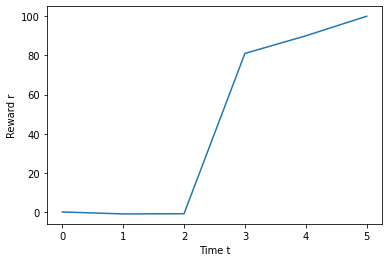

In [304]:
def run_policy_V(W,policy, V):
    trajectori = []
    traj_rewards = []
    V = V.copy()
    
    state, reward, termination, msgs = W.reset()
    trajectori.append(state)
    traj_rewards.append(reward)
    V[0,0] = -np.inf
    W.print_unicode()

    while(not termination):
        state, reward, termination, msgs = W.step(policy(state,V))
        trajectori.append(state)
        traj_rewards.append(reward)
        W.print_unicode()
        print(V)
        
    return trajectori, traj_rewards

def G(W,policy,t,V):
    gamma = 0.9
    
    states = []
    actions = []
    rewards = []
    
    index = 0
    sum_tmp = 0

    state, reward, termination, msgs = W.reset() 

    while(not termination):
        action = policy(state,V)
        state, reward, termination, msgs = W.step(action)

        states.append(state)
        actions.append(action)
        rewards.append(reward)
    
    for i in range(t):
        if (t >= len(rewards)):
            print("t cant be greater than numbers of rewards")
            return;
        elif (t+i >= len(rewards)):
            continue
        else:
            sum_tmp = (gamma**i)*rewards[t+i]
    
    G = sum_tmp

    print('Return: {0}'.format(G))
    return G

W = wlds.world1()
G_values = []
for t in range(8):
    G_values.append(G(W,my_policy,t,V.copy()))

plt.figure()
plt.xlabel('Time t')
plt.ylabel('Reward r')
plt.plot(np.arange(0,len(G_values)),G_values)

**Comment**: enter your comment here.

In [ ]:
"""

"""

A completely deterministic policy as the one we defined is always susceptible to underperform if the environment undergoes any change.

Design a world, possibly with minimal changes from *wlds.world1()*, where the optimal policy just learned fails. Run this world for 10 iterations using the learned greedy policy. 

In [305]:
W = gw.GridWorld(4,4, 0,0, 3,3)
W.add_wall(2,0)

run_policy_V(W,my_policy, V)

☺ □ □ □
□ □ □ □
■ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
■ □ □ □
□ □ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf  -0.92  -0.78  -0.6 ]
 [  0.    -0.7   -0.78  -0.7 ]
 [ -0.32  -0.53  -0.65 100.  ]]
Α □ □ □
☺ □ □ □
■ □ □ □
□ □ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf  -0.92  -0.78  -0.6 ]
 [  -inf  -0.7   -0.78  -0.7 ]
 [ -0.32  -0.53  -0.65 100.  ]]
Α □ □ □
□ ☺ □ □
■ □ □ □
□ □ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf   -inf  -0.78  -0.6 ]
 [  -inf  -0.7   -0.78  -0.7 ]
 [ -0.32  -0.53  -0.65 100.  ]]
Α □ □ □
□ □ □ □
■ ☺ □ □
□ □ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf   -inf  -0.78  -0.6 ]
 [  -inf   -inf  -0.78  -0.7 ]
 [ -0.32  -0.53  -0.65 100.  ]]
Α □ □ □
□ □ □ □
■ □ □ □
□ ☺ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf   -inf  -0.78  -0.6 ]
 [  -inf   -inf  -0.78  -0.7 ]
 [ -0.32   -inf  -0.65 100.  ]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[  -inf  -0.86  -0.72  -0.52]
 [  -inf   -inf  -0.78  -0.6 ]
 [  -inf   -inf  -0.78  -0.7 ]
 [  -inf   -inf  -0.65 100.  ]]
Α □ □ □
□ □ 

Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]

□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □



[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω

□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □

Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]

 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]

☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □

Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]

Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]
Α □ □ □
□ □ □ □
■ □ □ □
☺ □ □ Ω


[[ -inf -0.86 -0.72 -0.52]
 [ -inf  -inf -0.78 -0.6 ]
 [ -inf  -inf -0.78 -0.7 ]
 [ -inf  -inf -0.65  -inf]]

KeyboardInterrupt: 

In general, while learning and acting in the environment, it is a good idea to preserve some degree of *stochasticity* to keep analyzing the world and improve your policy.

Improving the policy of an agent is a central problem in reinforcement learning. The problem of **control** consists in finding or approximating an optimal policy. A common approach, which we have followed in this notebook, consists in alternating a step of *policy evaluation* and a step of *policy improvement*. In the example above, we have started with a random policy and we have computed the associated state-value matrix (policy evaluation); then, we have defined a greedy policy using the state-value matrix (policy improvement). This generic learning approach is called **Generalized Policy Iteration**. On more complex problem, several iterations of evaluation-improvement may be required to approximate an optimal policy.

# Optional: Q-Learning

**Q-Learning** is an *off-policy*, *temporal difference* reinforcement learning algorithm. 
Off-policy means that the agent learns an optimal target policy $\pi_t$ while behaving according to a different behaviour policy $\pi_b$; this allows, for instance, the agent to behave according to a sub-optimal exploratory policy while learning and memorizing an optimal policy. Temporal difference means that the agent uses an algorithm that allows learning in real-time without the need to collect whole episodes (as it was in the case of Monte Carlo).

Q-Learning does not rely on any model of the environment, and as such, it works estimating *state-action values* $q(s,a)$ instead of *state values* $v(s)$.

First, load *wlds.world1()* and randomly initialize a matrix/tensor to store the state-action values. 

In [413]:
W = wlds.world1()

Q = [[np.array([0,0,0,0]) for _ in range(4)] for _ in range(4)]
Q = np.array(Q)
print(Q)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


While acting in the world, we are going to define as a *behaviour policy* an $\epsilon$-greedy policy that, for each state, takes a random action with probability $\epsilon$ or the optimal action defined by the state-action matrix $q(s,a)$ with probability $1-\epsilon$.

Implement this policy as a function receiving as input the current state in the form of *gw.Loc()*, the current state-action matrix $q(s,a)$, and the parameter $\epsilon$.

In [414]:
def behaviour_policy(state,Q,eps):
    var = random.uniform(0, 1)
    if(var < 1-eps):
        action = random.randint(0, 3)
    else:
        index = np.where(Q[state.x][state.y] == max(Q[state.x][state.y]))
        action = index[0][0]
    return action

behaviour_policy(gw.Loc(0,0),Q,0.4)

0

We start our learning with the following parameters: discount factor $\gamma = 0.9$, learning rate $\alpha=0.1$, exploration stochasticity $\epsilon = 0.4$.

In [415]:
alpha = 0.1
gamma = 0.9
epsilon = 0.4

We now implement and run Q-learning for one episode.

1. Given that we are in state $s$, we choose an action $a$ according to our behaviour policy *behaviour_policy()*
2. We take action $a$, receive reward $r$ and end up in state $s'$
3. We update the action-value function $q(s,a)$ according to the following formula:
$$
q(s,a) \leftarrow q(s,a) + \alpha \left[ r + \gamma \max_{a'} q(s',a') - q(s,a) \right]
$$
where $\max_{a'} q(s',a')$ is the action-value of the action $a'$ that maximizes the action-value for state $s'$. 

In [482]:
Q = [[np.array([0,0,0,0]) for _ in range(4)] for _ in range(4)]
Q = np.array(Q)

def run_max(W,Q):
    Q = Q.copy()
    Q = Q.astype('float64')
    state, reward, termination, msgs = W.reset()
    while(not termination):
        a = behaviour_policy(state,Q,epsilon)
        old_state = state
        state, reward, termination, msgs = W.step(a)
        Q[old_state.x][old_state.y][a] = Q[old_state.x][old_state.y][a] + alpha * (reward + gamma * max(Q[state.x][state.y]) - Q[old_state.x][old_state.y][a])
        W.print_unicode()
    return Q
Q_use = run_max(W,Q)

☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ ☺ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ ☺
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ ☺ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ 

Observe the values in the action-value matrix, for instance in the pre-final states (2,3) or (3,2). Comment on the result.

In [483]:
print("(2,3): ",Q_use[2][3])
print("(3,2): ",Q_use[3][2])
print(Q_use)

(2,3):  [0. 0. 0. 0.]
(3,2):  [ 0.  0.  0. 10.]
[[[-0.2881  -0.2881  -0.2881  -0.271  ]
  [-0.20791 -0.1     -0.1     -0.28081]
  [-0.2071  -0.2881  -0.199   -0.2962 ]
  [-0.199   -0.3691  -0.271   -0.2881 ]]

 [[-0.2881  -0.30349 -0.199   -0.1    ]
  [-0.19    -0.109    0.      -0.19   ]
  [-0.19    -0.21601 -0.19    -0.19   ]
  [-0.28    -0.199    0.      -0.1    ]]

 [[-0.1     -0.109   -0.1     -0.19   ]
  [-0.1     -0.1     -0.1     -0.1    ]
  [-0.1     -0.109   -0.1      0.     ]
  [ 0.       0.       0.       0.     ]]

 [[-0.19    -0.1     -0.1     -0.1    ]
  [-0.1     -0.1     -0.19     0.     ]
  [ 0.       0.       0.      10.     ]
  [ 0.       0.       0.       0.     ]]]


**Comment**: enter your comment here.

Use the *mean* and *max* operator over the actions to compute an average and a max version of a state-value matrix from the action-state matrix (i.e.: average/max over the action). Comment on the result.

In [487]:
def run_mean(W,Q):
    Q = Q.copy()
    Q = Q.astype('float64')
    state, reward, termination, msgs = W.reset()
    while(not termination):
        a = behaviour_policy(state,Q,epsilon)
        old_state = state
        state, reward, termination, msgs = W.step(a)
        Q[old_state.x][old_state.y][a] = Q[old_state.x][old_state.y][a] + alpha * (reward + gamma * np.mean(Q[state.x][state.y]) - Q[old_state.x][old_state.y][a])
        W.print_unicode()
    return Q

In [488]:
Q_use = run_mean(W,Q)

Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ ☺ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
☺ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
☺ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
☺ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
☺ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ ☺ □ □
□ □ □ Ω


Α □ □ □
□ □ □ 

In [489]:
print("(2,3): ",Q_use[2][3])
print("(3,2): ",Q_use[3][2])
print(Q_use)

(2,3):  [ 0.         -0.10691427  0.          0.        ]
(3,2):  [-0.1        -0.10897864 -0.1        10.        ]
[[[-0.54872035 -0.32361057 -0.39837707 -0.39298398]
  [-0.42164326 -0.28207218 -0.37776497 -0.30926808]
  [-0.40879414 -0.2101998  -0.21247655 -0.19447472]
  [-0.29507437  0.         -0.10470478  0.        ]]

 [[-0.39273417 -0.31552914 -0.38764882 -0.40978147]
  [-0.31843214 -0.32696989 -0.4738429  -0.38719639]
  [-0.32729934 -0.20152244 -0.20331824 -0.28222477]
  [-0.30045769 -0.19890114  0.          0.        ]]

 [[-0.20740717 -0.40652534 -0.19235125 -0.29338608]
  [-0.20538217 -0.41378874 -0.19712018 -0.28199454]
  [-0.20742183 -0.1        -0.1945     -0.1       ]
  [ 0.         -0.10691427  0.          0.        ]]

 [[-0.10235125 -0.30726551 -0.10465415  0.        ]
  [-0.10927756 -0.10903947 -0.10491213 -0.10695202]
  [-0.1        -0.10897864 -0.1        10.        ]
  [ 0.          0.          0.          0.        ]]]


**Comment**: enter your comment here.

Run Q-learning for $10$ more episodes (without resetting your action-value matrix!)

In [491]:
n_episodes = 10
Q = [[np.array([0,0,0,0]) for _ in range(4)] for _ in range(4)]
Q = np.array(Q)

for _ in range(n_episodes):
    print("New episode")
    Q = run_max(W,Q)

New episode
☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ ☺ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ ☺ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
☺ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
☺ □ □ □
□ □ □ Ω


Α 

☺ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


☺ □ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α ☺ □ □
□ □ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ ☺ □ □
□ □ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ ☺ □ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ ☺ □
□ □ □ Ω


Α □ □ □
□ □ □ □
□ □ □ □
□ □ ☺ Ω


Α □ □ □
□ □ □ □
□ □ □ □
□ □ □ ☺




Print again from the action-state matrix, and comment on the results.

In [496]:
print(Q)

[[[-1.09843057e+00 -1.04092552e+00 -9.41319593e-01 -1.03070642e+00]
  [-6.86939672e-01 -6.76282769e-01 -6.71312936e-01 -7.73778997e-01]
  [-6.20592174e-01 -4.74135040e-01 -2.36370001e-01 -3.70639000e-01]
  [-3.11662900e-01 -3.69100000e-01 -3.77200000e-01 -2.97010000e-01]]

 [[-5.58509590e-01 -9.83037465e-01 -5.16439000e-01 -4.87198000e-01]
  [-5.84892829e-01 -4.38602605e-01 -3.64891127e-01 -4.49946100e-01]
  [-3.29734810e-01 -2.97406524e-01  2.30039821e+00 -5.22190000e-01]
  [-3.76390000e-01 -2.97739000e-01  1.97044100e+00 -4.64745610e-01]]

 [[-3.94039900e-01 -3.61000000e-01 -3.50598061e-01 -3.48772127e-01]
  [-3.93310900e-01 -3.29800420e-01 -1.18000000e-01  1.84513698e+00]
  [-3.00010127e-01 -3.76390000e-01  1.84033776e+01 -1.00000000e-01]
  [ 4.72400000e-02 -1.16201800e-01  1.00000000e+01 -1.00000000e-01]]

 [[-1.82322100e-01 -3.99871900e-01 -1.00000000e-01  6.58798100e-01]
  [-2.07100000e-01  0.00000000e+00  0.00000000e+00  1.09372220e+01]
  [ 5.16068000e-01  5.02946000e-01  4.8370

**Comment**: enter your comment here.

Consider how learning would change if you were to change the learning parameter, or if the environment were to change.

**Answer**: enter your answer here.

In [497]:
"""
Increase alpha will increase the value in the action-value matrix.
Increase epsilon here decrease randomness.
Increase gamma, increase the effect on value that depend on the next action.
"""

'\nIncrease alpha will increase the value in the action-value matrix.\nIncrease epsilon here decrease randomness.\nIncrease gamma, increase the effect on value that depend on the next action.\n'

## Function Approximators
So far we have solved the reinforcement learning problem using tables and matrices to store state-value, $v$, functions and action-value, $q$, functions. This is called the **tabular** approach to RL. This solution is simple and interpretable, but it has a severe limitation.

What happens if our gridworld becomes much bigger, extending to a 10000 by 10000 grid? How much memory would we need to store the state-value or the action-value function?

**Answer**: enter your answer here.

In [1]:
"""
If we got a tabel of 10000x10000. We assume that each grid have 4 directions.
Then we have to store 10000*10000*4=400000000 values.
"""

'\nIf we got a tabel of 10000x10000. We assume that each grid have 4 directions.\nThen we have to store 10000*10000*4=400000000 values.\n'

Can you imagine a way to solve this issue?

**Answer**: enter your answer here.

In [ ]:
"""
Instead to save reward to each route, then we can try a route, and save it and reward.
Then randomly try an other one, and compare the reward. It was better then before, then save it.
It not, then try an other one. The termination could be if we don't find any better route after a fix number
of episodes, or when the reward is good enougth. But still, in this way, we still need a representation of the matrix.
That take a lot of spaces.

So the other way so solve this problem with minimum use of the memory is to use nerual network.
We can use actor-critic method. Where we train 2 nerual network. Where one is the actor, that take a state
and compute a action. The critic take a state and perform action and give a value that represent the result.
Then the result is compared with reward, and give a feedback as a error.

The feedback error is then send back to actor and critic when these do the computation of next action and result value.
This way these 2 nerual network work together to learn, 
"""

# Conclusions

In this notebook we studied the basics of **reinforcement learning** through the analysis on a simple *gridworld* environment of two core RL problems: **policy evaluation** and **policy improvement**.

We first considered the problem of policy evaluation, that is, the problem of assessing how good a policy is. For **deterministic policies** we solved the problem simply by computing the *total discounted return* of a policy. After realizing the limitation of deterministic policies, we turned to **stochastic policies**, and we computed their *return in expectation* relying on *Monte Carlo methods*.

Next we considered the problem of policy improvement, that is, the problem of learning optimal policies. For this task, we realized that a global value for a policy is not handy when improving a policy, and, instead local values would be more useful. We then computed **state values** and **action values** to assess a policy step by step, and used this values to take improved actions. This iterative approach, based on evaluating a policy and improving the policy, is an instance of the more generic method called **Generalized Policy Iteration**.

In the final optional part, we considered a more advanced RL algorithm, **Q-learning**. Q-learning allowed us to learn an optimal policy while interacting with an environment; this algorithm had two important features: (i) it learns in a continuous way, step-by-step, and not on complete episodes; (ii) it learns an optimal policy while behaving according to a different, more exploration-prone, policy.